<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Data_Science/blob/main/fashion_mnist_12hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, array_to_img

In [2]:
def change_shape(x):
    x = np.reshape(x, (len(x), 28, 28, 1))
    x_resized = x.copy()
    x_resized.resize((len(x), 28, 28, 3), refcheck=False)
    x = x_resized
    x = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in x])
    x = x / 255.
    x = x.astype('float32')
    return x

fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
classes = np.unique(y_train)
num_classes = len(classes)

x_train = change_shape(x_train)
x_test = change_shape(x_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 48, 48, 3), y=(60000, 10)
Test: X=(10000, 48, 48, 3), y=(10000, 10)


In [5]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation='softmax'),
])
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
history =     model.fit(x_train, y_train, batch_size=16, epochs=5,
              validation_split=0.20)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/5
3000/3000 [==============================] - 1452s 484ms/step - loss: 0.3252 - acc: 0.1058 - val_loss: 0.3251 - val_acc: 0.0983
Epoch 2/5
3000/3000 [==============================] - 1433s 478ms/step - loss: 0.3251 - acc: 0.1048 - val_loss: 0.3251 - val_acc: 0.0983
Epoch 3/5
3000/3000 [==============================] - 1435s 478ms/step - loss: 0.3250 - acc: 0.1070 - val_loss: 0.3251 - val_acc: 0.1013
Epoch 4/5
3000/3000 [==============================] - 1451s 484ms/step - loss: 0.3249 - acc: 0.1094 - val_loss: 0.3252 - val_acc: 0.0983
Epoch 5/5
313/313 [==============================] - 234s 747ms/step - loss: 0.3257 - acc: 0.0974
[0.3257488012313843, 0.09740000218153]


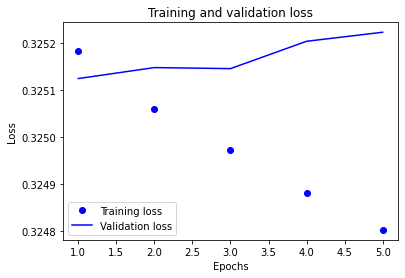

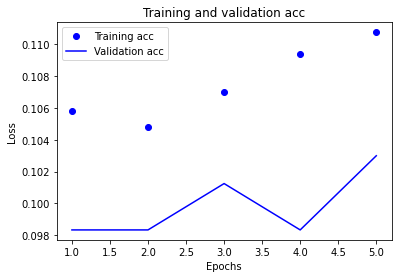

In [10]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()